In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer

CSV_FILE_PATH = 'train.csv'

df = pd.read_csv(CSV_FILE_PATH)

In [4]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [54]:
def prepare_samples(df):
    return df.values.reshape((df.shape[0], 28, 28, 1)).astype('float32') / 255

samples = prepare_samples(df[df.columns[1:len(df.columns)]])

samples.shape

(42000, 28, 28, 1)

In [43]:
labelTransformator = LabelBinarizer()

targets = labelTransformator.fit_transform(df['label'].values)

targets.shape

(42000, 10)

In [78]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [79]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
PATH_TO_BEST_MODEL = 'models/best_model.hdf5'

callbacks = [
    keras.callbacks.ModelCheckpoint(PATH_TO_BEST_MODEL, 
                                    monitor='val_acc', 
                                    verbose=0, 
                                    save_best_only=True, 
                                    save_weights_only=False, 
                                    mode='auto', 
                                    period=1)
]

history = model.fit(samples,
                    targets,
                    epochs=50,
                    callbacks=callbacks,
                    batch_size=64,
                    validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 16s 480us/step - loss: 0.3304 - acc: 0.8957 - val_loss: 0.0817 - val_acc: 0.9731
Epoch 2/50
33600/33600 [==============================] - 16s 473us/step - loss: 0.1050 - acc: 0.9677 - val_loss: 0.0752 - val_acc: 0.9770
Epoch 3/50
33600/33600 [==============================] - 17s 503us/step - loss: 0.0770 - acc: 0.9749 - val_loss: 0.0497 - val_acc: 0.9836
Epoch 4/50
33600/33600 [==============================] - 17s 518us/step - loss: 0.0606 - acc: 0.9807 - val_loss: 0.0410 - val_acc: 0.9879
Epoch 5/50
33600/33600 [==============================] - 17s 520us/step - loss: 0.0526 - acc: 0.9843 - val_loss: 0.0369 - val_acc: 0.9883
Epoch 6/50
33600/33600 [==============================] - 17s 518us/step - loss: 0.0477 - acc: 0.9853 - val_loss: 0.0391 - val_acc: 0.9886
Epoch 7/50
33600/33600 [==============================] - 17s 515us/step - loss: 0.0414 - acc: 0.9867 - val_loss: 0.0

             acc    val_acc       loss   val_loss
count  50.000000  50.000000  50.000000  50.000000
mean    0.990126   0.989974   0.033245   0.049462
std     0.014645   0.003440   0.045861   0.012847
min     0.895714   0.973095   0.016655   0.031009
25%     0.991622   0.989911   0.019360   0.037356
50%     0.994182   0.991012   0.021078   0.047470
75%     0.994792   0.991310   0.026174   0.057772
max     0.995863   0.992619   0.330351   0.081746


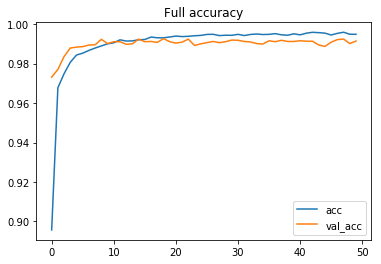

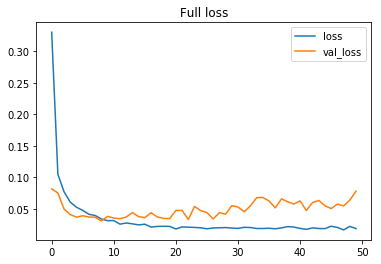

In [81]:
%matplotlib inline

history_df = pd.DataFrame(
    {'acc': history.history['acc'],
     'val_acc': history.history['val_acc'],
     'loss': history.history['loss'],
     'val_loss': history.history['val_loss']
    })

print(history_df.describe())

history_df[['acc', 'val_acc']].plot(title='Full accuracy')
history_df[['loss', 'val_loss']].plot(title='Full loss')

In [82]:
best_model = keras.models.load_model(PATH_TO_BEST_MODEL)

In [83]:
CSV_TEST_FILE_PATH = 'test.csv'

df_test = pd.read_csv(CSV_TEST_FILE_PATH)

df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
samples_test = prepare_samples(df_test)

samples_test.shape

(28000, 28, 28, 1)

In [85]:
predictions = best_model.predict(samples_test)

predictions.shape

(28000, 10)

In [86]:
submission = [[i + 1, predictions[i].argmax(axis=0)] for i in range(predictions.shape[0])]

In [87]:
df_submission =  pd.DataFrame(submission, columns=['ImageId', 'Label'])
df_submission.set_index('ImageId', inplace=True)

df_submission.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3


In [88]:
df_submission.to_csv('submission.csv')